In [130]:
import pandas as pd
import matplotlib.pyplot as plt


In [131]:
# Load the Excel file
file_path = 'C:\\Users\\Tassili\\Downloads\\naftal-str-main\\res\\Données collectées.xlsx'  # Update with your actual file path
sheet_name = 'Liste compléte'  # Update with your actual sheet name if different

# Define the range to read
cols = 'B:M'

# Read the specified range into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=cols,)
df = df.dropna(axis=1, how='all')

# Display the DataFrame
# Set the first row as the column headers
df.columns = df.iloc[0]
df = df[1:]

# # Reset the index
df.reset_index(drop=True, inplace=True)
# df.head()

In [132]:
# Function to convert the string of coordinates into a tuple of floats
def convert_to_tuple(coord_str):
    # print(coord_str, type(coord_str))
    new =  str(coord_str).split(',')
    # if len(new) != 4: print(f"c{coord_str}, n{new}")
    # print([float(new[0]+"." + new[1]), float(new[2] + "."+new[3])])
    new = [float(new[0]+"." + new[1]), float(new[2] + "."+new[3])]
    return new

df["Localisation Coordonnées GPS"] = df["Localisation Coordonnées GPS"].apply(convert_to_tuple)
# df.head()

In [133]:
# Split the values in the "Population" column by a comma and convert them into lists
df['Population'] = df['Population'].apply(lambda x: [item.strip() for item in x.split(',')] if pd.notna(x) else [])
df.head()

,Points de Ramassage,Localisation Coordonnées GPS,n min,n max,temps d'arrivée,temps de départ,Population,Ligne,Remarque
0,Oued romane fleuriste,"[36.7422417, 2.9948409]",0,1,7h15,7h15,[],Oued romane,
1,Arrêt de bus sahraoui,"[36.7461768, 2.9978604]",6,6,7h20,7h20,[],Oued romane,
2,Rond point ain allah,"[36.7507444, 2.9930777]",3,3,7h25,7h25,[],Oued romane,
3,Bois des cars,"[36.7542342, 2.9808777]",2,3,7h27,7h27,[S1],Oued romane,
4,Intersection,"[36.7541839, 2.9728183]",1,1,7h29,7h29,[],Oued romane,


In [134]:
df.iloc[0]["temps d'arrivée"]

'7h15'

In [135]:
len(df[df["temps d\'arrivée"].isna()])

106

In [136]:
# Sum the 'n min' and 'n max' columns
n_min_sum = df['n min'].astype(float).sum()
n_max_sum = df['n max'].astype(float).sum()

# Display the sums
print(f"Sum of 'n min': {n_min_sum}")
print(f"Sum of 'n max': {n_max_sum}")

Sum of 'n min': 801.0
Sum of 'n max': 896.0


In [137]:
# Population info dictionary with type and count
population = {
    "G": ["Gendarme", 0],
    "S": ["Stagiaire", 0],
    "M": ["Personnel de ménage", 0],
    "P": ["Personnel du ministere de l'industrie pharmaceutique", 0],
    "E": ["Enfants de creche", 0],
    "V": ["Personnel véhiculé", 0],
    "B": ["Personnel de la banque", 0],
    "C": ["Personnel de la cantine", 0], 
    "A": ["Apprenti", 0],
    "N": ["Missionnaire", 0]
}
# for every population row, count the number of subpopulations
for i in list(df["Population"]):
    # as long as not empty
    if i != [] and i != ['']:
        # for every subpopulation
        for j in i:
            # according to the population code add the number of subpopulation
            population[j[0]][1] += int(j[1:])
# add subpopulation ratio
for key in population.keys():
    population[key].append(population[key][1] / n_max_sum)
# add Naftal personnel population
population["Naftal"] = ["Personnel de Naftal",
                        n_max_sum - sum(population[key][1] for key in population.keys()),
                        1 - sum(population[key][2] for key in population.keys())]
population

{'G': ['Gendarme', 90, 0.10044642857142858],
 'S': ['Stagiaire', 26, 0.029017857142857144],
 'M': ['Personnel de ménage', 10, 0.011160714285714286],
 'P': ["Personnel du ministere de l'industrie pharmaceutique",
  5,
  0.005580357142857143],
 'E': ['Enfants de creche', 3, 0.0033482142857142855],
 'V': ['Personnel véhiculé', 7, 0.0078125],
 'B': ['Personnel de la banque', 2, 0.002232142857142857],
 'C': ['Personnel de la cantine', 17, 0.018973214285714284],
 'A': ['Apprenti', 1, 0.0011160714285714285],
 'N': ['Missionnaire', 1, 0.0011160714285714285],
 'Naftal': ['Personnel de Naftal', 734.0, 0.8191964285714286]}

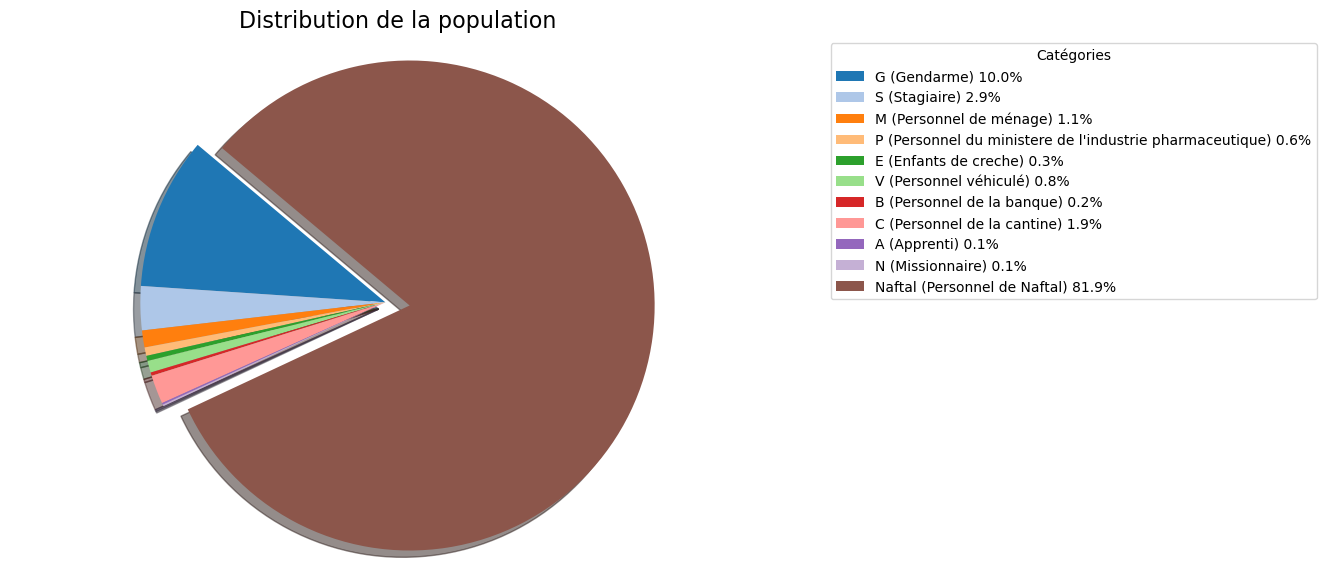

In [138]:
# Extract the data for the pie chart
labels = [key for key in population.keys()]
sizes = [population[key][1] for key in population.keys()]
descriptions = [population[key][0] for key in population.keys()]
percent = [round(population[key][2],3) for key in population.keys()]

# Define colors and explode
colors = plt.get_cmap('tab20').colors
explode = [0.1 if label == 'Naftal' else 0 for label in labels]

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, 
        # labels=labels, 
        # autopct='%1.1f%%', 
        shadow=True, 
        startangle=140, 
        explode=explode,
        colors=colors,
        textprops={'fontsize': 14})

plt.title('Distribution de la population', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend with descriptions
legend_labels = [f"{label} ({description}) {round(perc * 100,3)}%" for label, description, perc in zip(labels, descriptions, percent)]
plt.legend(legend_labels, title="Catégories", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

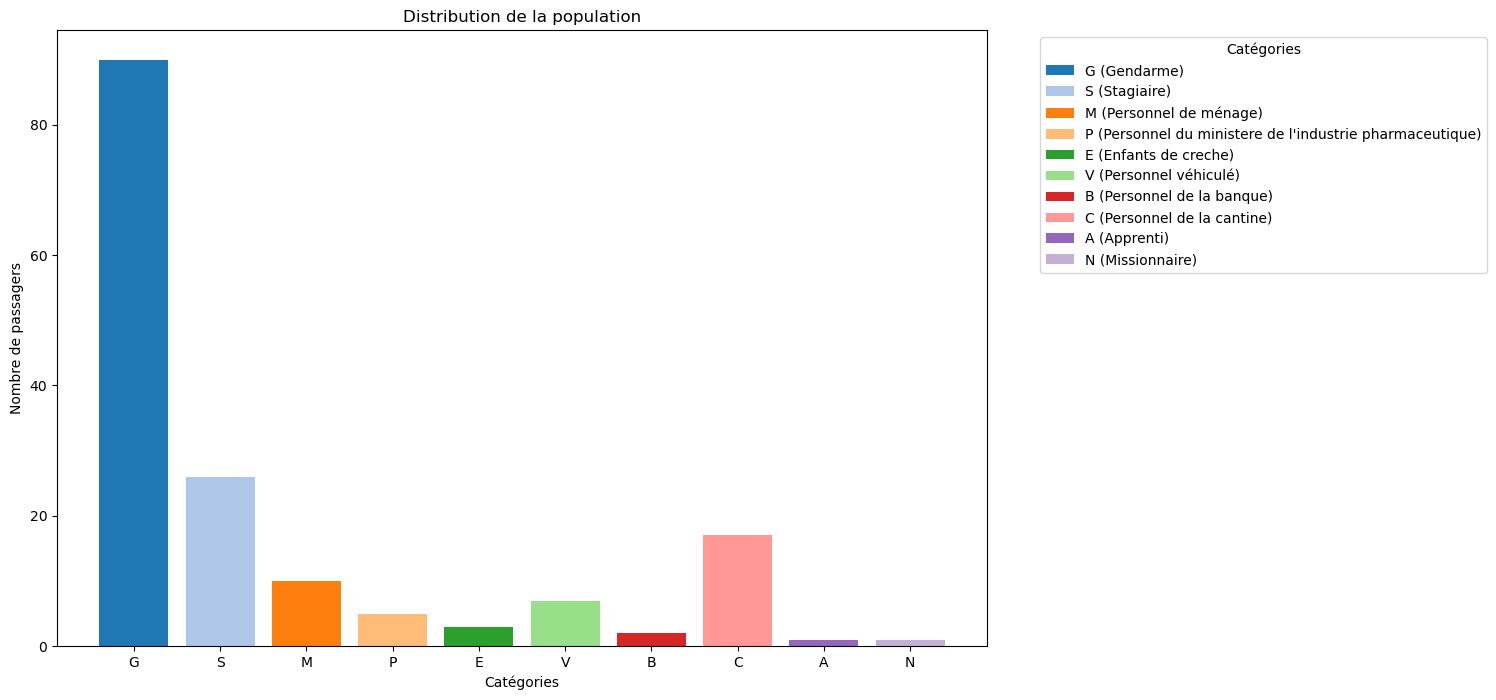

In [139]:
# Extract data excluding 'Naftal'
labels = [key for key in population.keys() if key != 'Naftal']
sizes = [population[key][1] for key in labels]
descriptions = [population[key][0] for key in labels]

# Define colors
colors = plt.get_cmap('tab20').colors[:len(labels)]

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(labels, sizes, color=colors)

# Add a legend with descriptions
legend_labels = [f"{label} ({description})" for label, description in zip(labels, descriptions)]
plt.legend(bars, legend_labels, title="Catégories", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Catégories')
plt.ylabel('Nombre de passagers')
plt.title('Distribution de la population')

plt.show()

In [140]:
# bus sheet
bus_sheet = 'Types de véhicules'
# Define the range to read
buscols = 'B:E'
# bus dataframe
busdf = pd.read_excel(file_path, sheet_name=bus_sheet, usecols=buscols)
busdf = busdf.dropna(axis=1, how='all')
# Set the first row as the column headers
busdf.columns = busdf.iloc[0]
busdf = busdf[1:9]

# Reset the index
busdf.reset_index(drop=True, inplace=True)
# Split the values in the "Lignes" column by a comma and convert them into lists
busdf['Lignes'] = busdf['Lignes'].apply(lambda x: [item.strip() for item in x.split(',')] if pd.notna(x) else [])
busdf.head()
busdf

,Modèle,Capacité,Lignes,Nombre
0,Hyundai County,29,"[Alger plage, El hamiz, Ouled chebel, Soumaa, ...",13
1,Mercedes Sprinter,23,"[Ain naadja, Salembier, Oued romane, Hraoua, T...",6
2,Iveco,49,"[Bouinane, Sidi abdellah, Mauritania, Alger ce...",4
3,Isuzu Turquoise,33,"[Baba hassen, Lot michel]",2
4,Vanhool,54,"[Douera, Fouka, Ain beniane 1, Ain beniane 2]",4
5,Toayota Coaster,29,"[Shaoula, Blida, Zeralda, Boumerdes]",4
6,Higer,37,"[Mahelma, Cherchell]",2
7,Isuzu eco classic,26,[Ain malha],1


In [141]:
ligne_bus_dict = { ligne: [df[df["Ligne"] == ligne]["n max"].sum()] for ligne in df["Ligne"]}
ligne_bus_dict

{'Oued romane': [22],
 'Lot michel': [19],
 'Blida': [26],
 'Larbaa': [23],
 'Salembier': [12],
 'Soumaa': [21],
 'Mahelma': [44],
 'Ouled chebel': [26],
 'Cherchell': [48],
 'Oued smar': [15],
 'Hraoua': [19],
 'Baba hassen': [28],
 'Ain naadja': [24],
 'Mauritania': [28],
 'Douera': [34],
 'Fouka': [54],
 'Ain beniane 1': [24],
 'Ain beniane 2': [28],
 'Bouinane': [31],
 'Sidi abdellah': [37],
 'Zeralda': [20],
 'Khmiss el khechna ': [19],
 'Bouzereah 1': [23],
 'Bouzereah 2': [22],
 'Boumerdes': [26],
 'Alger centre': [19],
 'Shaoula': [26],
 'Tamenfoust': [17],
 'Ruisseau': [25],
 'H-dey': [18],
 'Bachdjerah': [30],
 'El hamiz': [15],
 'Bab el oued': [22],
 'Ain malha': [12],
 'Souidania': [24],
 'Alger plage': [15]}

In [142]:
# 1. Aggregate data: Sum of n min and n max for each Ligne
df_sum = df.groupby('Ligne').agg({'n min': 'sum', 'n max': 'sum'}).reset_index()
df_sum.columns = ['Ligne', 'Sum n min', 'Sum n max']
# 2. Match bus data and calculate bus capacity and occupancy rate
result = []

for i, row in df_sum.iterrows():
    ligne = row['Ligne']
    sum_n_min = row['Sum n min']
    sum_n_max = row['Sum n max']
    
    bus_info = busdf[busdf['Lignes'].apply(lambda x: ligne in x)]
    if len(bus_info) == 0:
        print(ligne)
    for _, bus in bus_info.iterrows():
        model = bus['Modèle']
        capacity = bus['Capacité']
        bus_count = bus['Nombre']
        occupancy_rate_min = sum_n_min / capacity if capacity > 0 else 0
        occupancy_rate_max = sum_n_max / capacity if capacity > 0 else 0
        
        result.append({
            'Ligne': ligne,
            'Sum n min': sum_n_min,
            'Sum n max': sum_n_max,
            'Bus Used': model,
            'Bus Capacity': capacity,
            'Occupancy Rate Min': occupancy_rate_min,
            'Occupancy Rate Max': occupancy_rate_max
        })

df_result = pd.DataFrame(result)

Khmiss el khechna 


In [143]:
df_result

,Ligne,Sum n min,Sum n max,Bus Used,Bus Capacity,Occupancy Rate Min,Occupancy Rate Max
0,Ain beniane 1,23,24,Vanhool,54,0.425926,0.444444
1,Ain beniane 2,22,28,Vanhool,54,0.407407,0.518519
2,Ain malha,12,12,Isuzu eco classic,26,0.461538,0.461538
3,Ain naadja,21,24,Mercedes Sprinter,23,0.913043,1.043478
4,Alger centre,19,19,Iveco,49,0.387755,0.387755
5,Alger plage,15,15,Hyundai County,29,0.517241,0.517241
6,Bab el oued,22,22,Hyundai County,29,0.758621,0.758621
7,Baba hassen,25,28,Isuzu Turquoise,33,0.757576,0.848485
8,Bachdjerah,30,30,Hyundai County,29,1.034483,1.034483
9,Blida,26,26,Toayota Coaster,29,0.896552,0.896552


In [46]:
df_result[df_result["Occupancy Rate Min"] > 1 ] 

,Ligne,Sum n min,Sum n max,Bus Used,Bus Capacity,Occupancy Rate Min,Occupancy Rate Max
7,Bachdjerah,30,30,Hyundai County,29,1.034483,1.034483
12,Cherchell,42,48,Higer,37,1.135135,1.297297


In [47]:
df_result[df_result["Occupancy Rate Max"] > 1 ] 

,Ligne,Sum n min,Sum n max,Bus Used,Bus Capacity,Occupancy Rate Min,Occupancy Rate Max
3,Ain naadja,21,24,Mercedes Sprinter,23,0.913043,1.043478
7,Bachdjerah,30,30,Hyundai County,29,1.034483,1.034483
12,Cherchell,42,48,Higer,37,1.135135,1.297297
20,Mahelma,28,44,Higer,37,0.756757,1.189189


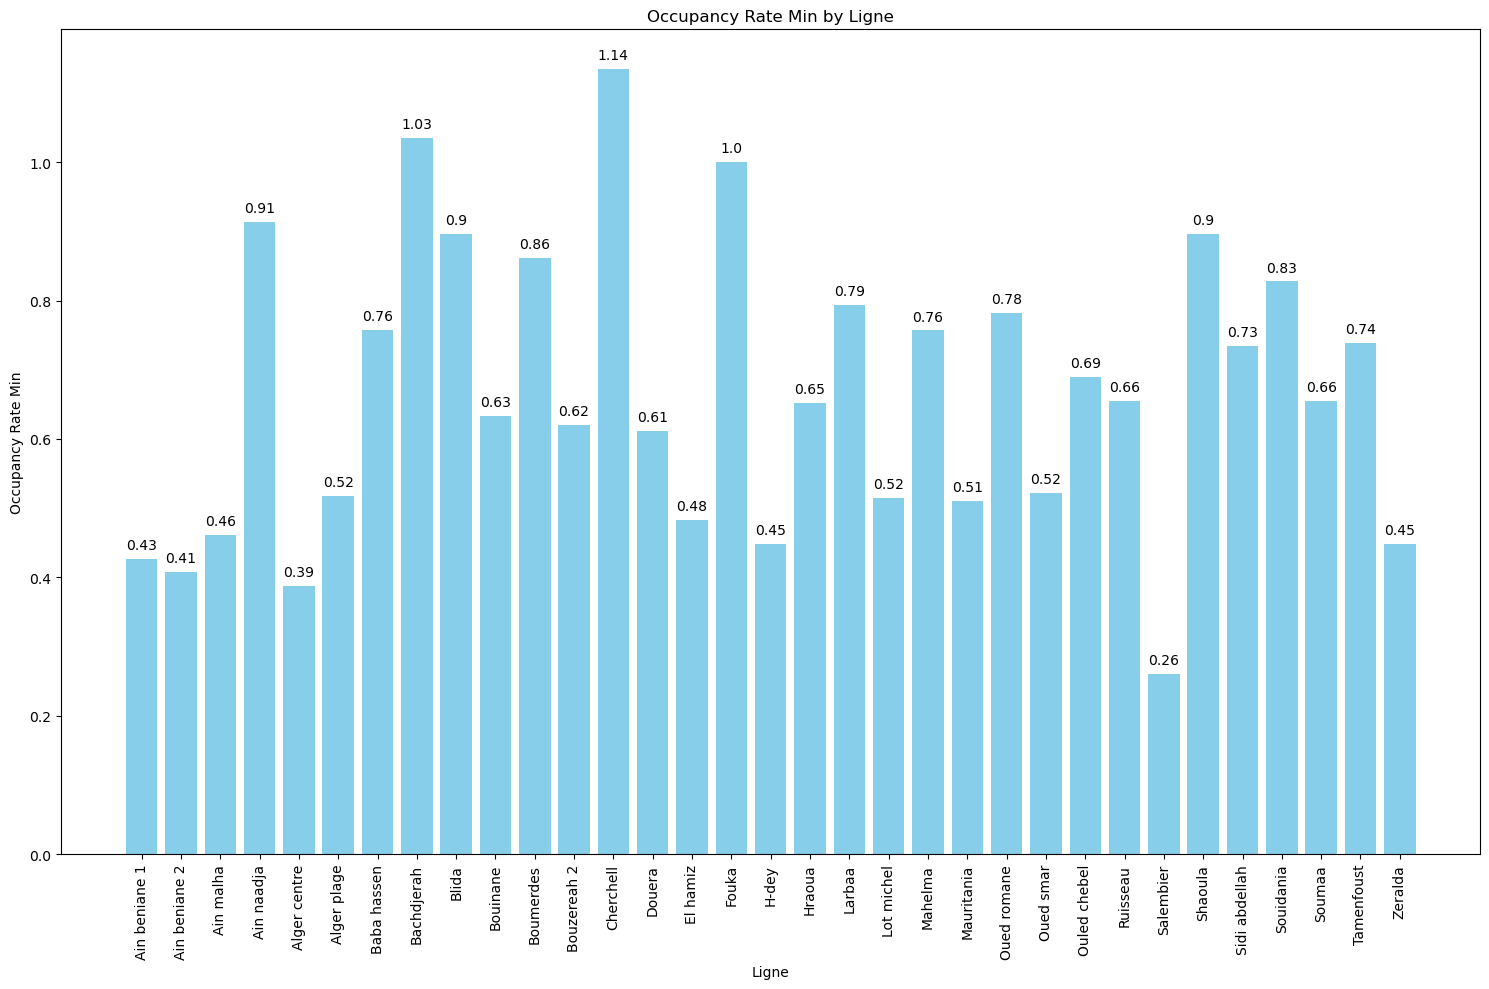

In [48]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Creating the bar plot
bars = ax.bar(df_result['Ligne'], df_result['Occupancy Rate Min'], color='skyblue')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Ligne')
plt.ylabel('Occupancy Rate Min')
plt.title('Occupancy Rate Min by Ligne')

# Adding data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Adjusting layout to prevent clipping of labels
plt.tight_layout()

# Showing the plot
plt.show()

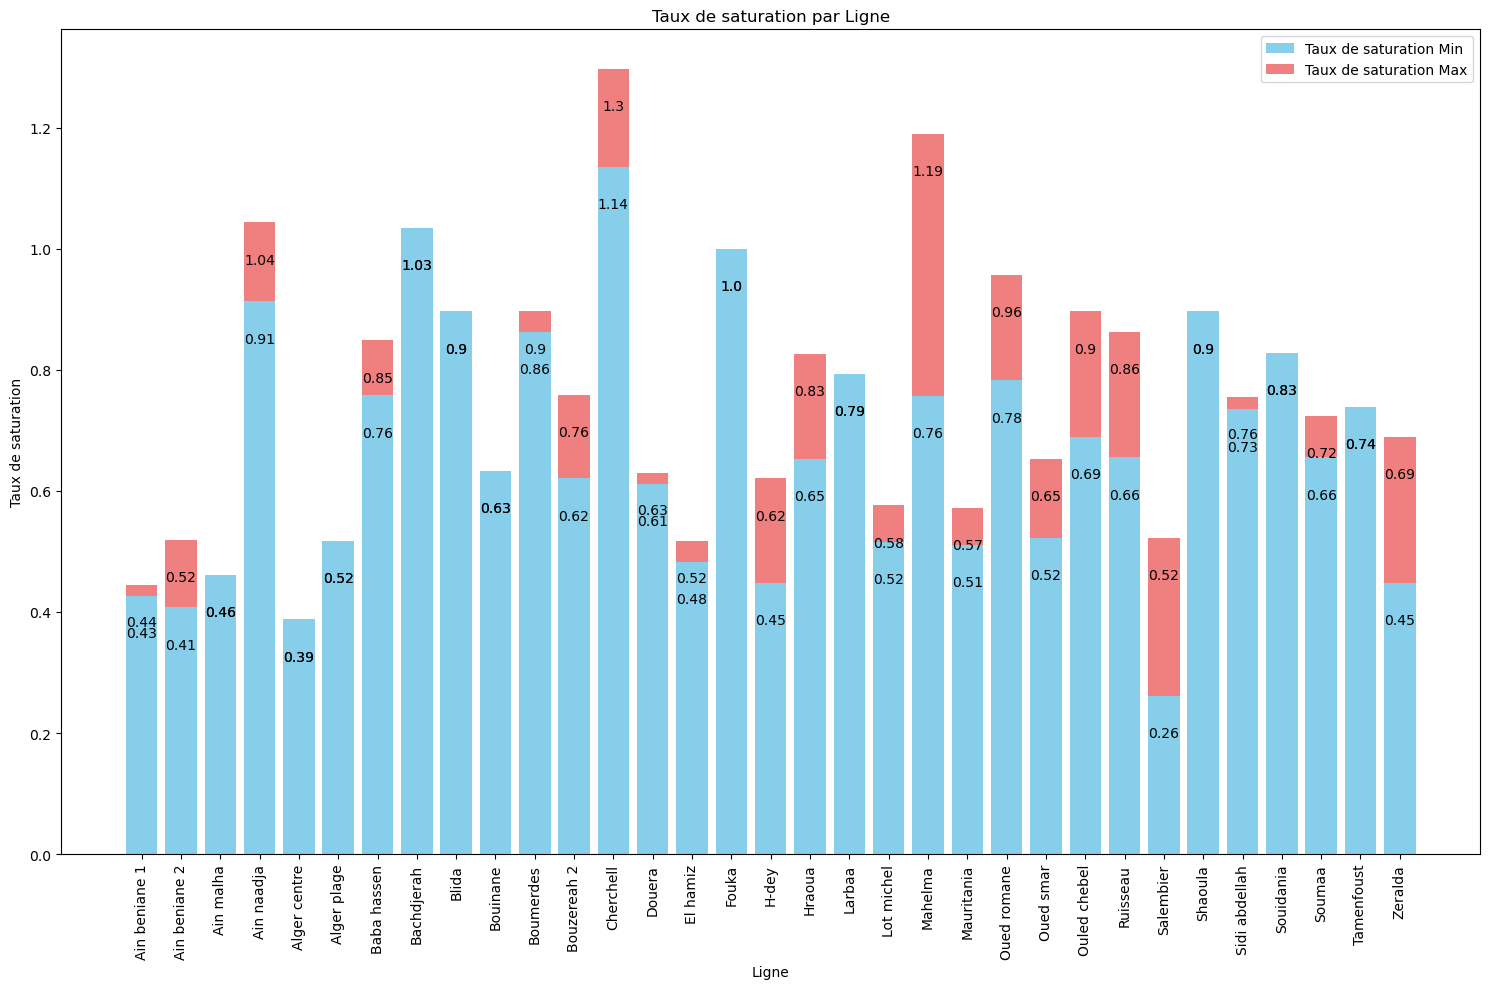

In [61]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Creating the stacked bar plot
bar1 = ax.bar(df_result['Ligne'], df_result['Occupancy Rate Min'] , label='Taux de saturation Min',
             color='skyblue')
bar2 = ax.bar(df_result['Ligne'], (df_result['Occupancy Rate Max'] - df_result['Occupancy Rate Min']), 
              bottom=df_result['Occupancy Rate Min'], label='Taux de saturation Max', color='lightcoral')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Ligne')
plt.ylabel('Taux de saturation')
plt.title('Taux de saturation par Ligne')
plt.legend()

# Adding data labels on top of bars
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval - 0.05, round(yval, 2), ha='center', va='top', color='black')
for bar in bar2:
    yval = bar.get_height() + bar.get_y()
    ax.text(bar.get_x() + bar.get_width()/2, yval - 0.05, round(yval, 2), ha='center', va='top', color='black')

# Adjusting layout to prevent clipping of labels
plt.tight_layout()

# Showing the plot
plt.show()

In [211]:
lignesss = {}
for ligne in df["Ligne"]:
    lignesss[ligne] = []
    for pop in df[df["Ligne"] == ligne]["Population"]:
        if pop != [] and pop != ['']:
            lignesss[ligne].extend(pop)
lignesss

{'Oued romane': ['S1', 'S1'],
 'Lot michel': ['G1', 'S1', 'G1'],
 'Blida': ['G1', 'G1'],
 'Larbaa': ['G2', 'G2', 'M1'],
 'Salembier': ['V1'],
 'Soumaa': ['E2'],
 'Mahelma': ['G1', 'P3', 'G1', 'V1', 'C1'],
 'Ouled chebel': ['A1', 'M1'],
 'Cherchell': ['C2', 'G1'],
 'Oued smar': ['S1', 'G1', 'S2'],
 'Hraoua': ['N1', 'G2', 'G2', 'G1', 'G1', 'G1'],
 'Baba hassen': ['S1', 'G1', 'G1', 'M2', 'M2', 'G1', 'B1'],
 'Ain naadja': ['C1', 'C1', 'G3', 'S3', 'C1', 'V1', 'G2', 'S1'],
 'Mauritania': ['V1', 'V1', 'G3', 'S1', 'G1', 'G2', 'G2', 'G1'],
 'Douera': ['G1', 'G1'],
 'Fouka': [],
 'Ain beniane 1': ['M1', 'G1'],
 'Ain beniane 2': [],
 'Bouinane': ['G1', 'G1', 'G1', 'G1', 'G1', 'G2', 'G2'],
 'Sidi abdellah': ['C1', 'G1', 'G1', 'G1', 'C1', 'P1'],
 'Zeralda': ['S1', 'G1', 'G1', 'S1', 'G1', 'S2', 'M1', 'S1', 'V1'],
 'Khmiss el khechna ': ['G1', 'S1', 'C2', 'C1', 'V1', 'C1'],
 'Bouzereah 1': ['G2', 'S1', 'G1'],
 'Bouzereah 2': ['S1', 'G1', 'P1', 'S1', 'G3', 'M1'],
 'Boumerdes': ['G3', 'S1', 'G1', 'G2',

In [213]:
len(df[df["n min"] == 0])

26

In [214]:
df[df["n min"] == 0]

,Points de Ramassage,Localisation Coordonnées GPS,n min,n max,temps d'arrivée,temps de départ,Population,Ligne,Remarque
0,Oued romane fleuriste,"[36.7422417, 2.9948409]",0,1,7h15,7h15,[],Oued romane,
53,Serir rond point,"[36.742044, 3.0651812]",0,3,7h23,7h23,[],Salembier,
65,commissariat sidi bennour,"[36.6558948, 2.8782148]",0,1,6h55,6h55,[],Mahelma,
70,Station NAFTAl Belle Vue\n,"[36.6867134, 2.8753512]",0,1,7h16,7h16,[],Mahelma,
73,Geni zeralda\n,"[36.719287, 2.8497123]",0,1,7h26,7h26,[V1],Mahelma,
79,Mosquée Abi moussa El achaari\n,"[36.6033322, 2.9967379]",0,1,6h20,6h20,[A1],Ouled chebel,
80,El hajra mhamdia\n,"[36.6114895, 2.9964549]",0,1,6h21,6h21,[],Ouled chebel,
86,APC birtouta\n,"[36.6452974, 2.9917148]",0,1,7h05,7h05,[],Ouled chebel,
92,Opgi khraicia\n,"[36.6718033, 2.9816619]",0,1,7h20,7h20,[],Ouled chebel,
94,Arrêt de bus entré khraicia\n,"[36.6745472, 2.9774029]",0,1,7h21,7h21,[],Ouled chebel,
